## Implementación de modelo de ML para clasificación de sismos ##

### Algoritmo SVM ###

1. Importa las bibliotecas necesarias:
   - from sklearn import svm
   - from sklearn.model_selection import train_test_split
   - from sklearn.metrics import accuracy_score

2. Divide tus datos en características (X) y etiquetas (y) correspondientes a la intensidad del sismo y la clasificación de destrucción (vidas, casas destruidas, dinero gastado), respectivamente.

3. Divide los datos en conjuntos de entrenamiento y prueba utilizando train_test_split:
   - X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Crea una instancia del clasificador SVM:
   - clf = svm.SVC()

5. Entrena el modelo utilizando los datos de entrenamiento:
   - clf.fit(X_train, y_train)

6. Realiza predicciones en el conjunto de prueba:
   - y_pred = clf.predict(X_test)

7. Evalúa el rendimiento del modelo utilizando la precisión (accuracy):
   - accuracy = accuracy_score(y_test, y_pred)
   - print("Precisión del modelo SVM:", accuracy)

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_noaa = pd.read_csv('/Users/macbookpro/Desktop/TerraSafe/Data/Cleaned data/NOAA.csv')
df_noaa


,locationName,latitude,longitude,eqMagnitude,tsunami,volcano,country,eqDepth,intensity,date,updatedDeaths,updatedDeathsAmountOrder,updatedInjuries,updatedInjuriesAmountOrder,updatedHousesDamaged,updatedHousesDamagedAmountOrder,updatedHousesDestroyed,updatedHousesDestroyedAmountOrder,updatedDamage,updatedDamageAmountOrder
0,JAPAN: UCHIURA BAY,42.070,140.680,6.5,1,1,JAPAN,NaN,NaN,1640-07-31,700.0,3.0,NaN,NaN,NaN,NaN,20.0,1.0,0.5,1.0
1,JAPAN: NEAR S COAST HONSHU: KOZU-SHIMA,34.221,139.131,6.1,1,1,JAPAN,10.0,NaN,2000-07-01,1.0,1.0,101.0,3.0,NaN,NaN,NaN,NaN,0.5,1.0
2,RWANDA: RUBAVU; CONGO,-1.601,29.400,4.7,0,1,RWANDA,10.0,7.0,2021-05-25,32.0,1.0,NaN,NaN,1.0,1.0,5000.0,4.0,5.0,3.0
3,CHINA: SHAANXI PROVINCE,35.600,110.900,5.4,0,0,CHINA,NaN,7.0,1959-08-10,NaN,NaN,NaN,NaN,NaN,NaN,43.0,1.0,0.5,1.0
4,"PERU: CAMANA, AREQUIPA",-16.660,-72.662,6.8,0,0,PERU,87.0,6.0,1999-04-03,1.0,1.0,50.0,1.0,300.0,3.0,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,PERU,-16.300,-71.000,8.0,0,0,PERU,25.0,9.0,1471-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4582,"INDONESIA: JAVA: LABUHAN, MENES, PONOROGO",-6.400,105.400,6.6,1,0,INDONESIA,64.0,NaN,1963-12-16,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.5,1.0
4583,CHINA: TIBET (XIZANG PROVINCE),29.807,90.350,6.3,0,0,CHINA,12.0,NaN,2008-10-06,9.0,1.0,19.0,1.0,NaN,NaN,101.0,3.0,1.0,2.0
4584,PERU,-12.200,-77.600,7.8,0,0,PERU,30.0,7.0,1582-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_noaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4586 entries, 0 to 4585
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   locationName                       4585 non-null   object 
 1   latitude                           4584 non-null   float64
 2   longitude                          4584 non-null   float64
 3   eqMagnitude                        4586 non-null   float64
 4   tsunami                            4586 non-null   int64  
 5   volcano                            4586 non-null   int64  
 6   country                            4585 non-null   object 
 7   eqDepth                            3332 non-null   float64
 8   intensity                          2203 non-null   float64
 9   date                               4586 non-null   object 
 10  updatedDeaths                      2228 non-null   float64
 11  updatedDeathsAmountOrder           2228 non-null   float

cambiar nombre a espanol para entender mejor el proyecto 

In [4]:
# Definir el mapeo de nombres de columnas en inglés y español
nombres_columnas = {
    'locationName': 'nombreUbicacion',
    'latitude': 'latitud',
    'longitude': 'longitud',
    'eqMagnitude': 'magnitudSismo',
    'tsunami': 'tsunami',
    'volcano': 'volcan',
    'country': 'pais',
    'eqDepth': 'profundidadSismo',
    'intensity': 'intensidad',
    'date': 'fecha',
    'updatedDeaths': 'muertesActualizadas',
    'updatedDeathsAmountOrder': 'ordenCantidadMuertesActualizadas',
    'updatedInjuries': 'lesionesActualizadas',
    'updatedInjuriesAmountOrder': 'ordenCantidadLesionesActualizadas',
    'updatedHousesDamaged': 'casasDanadasActualizadas',
    'updatedHousesDamagedAmountOrder': 'ordenCantidadCasasDanadasActualizadas',
    'updatedHousesDestroyed': 'casasDestruidasActualizadas',
    'updatedHousesDestroyedAmountOrder': 'ordenCantidadCasasDestruidasActualizadas',
    'updatedDamage': 'danosActualizados',
    'updatedDamageAmountOrder': 'ordenCantidadDanosActualizados'
}

# Cambiar los nombres de las columnas
df = df_noaa.rename(columns=nombres_columnas)

In [5]:
df

,nombreUbicacion,latitud,longitud,magnitudSismo,tsunami,volcan,pais,profundidadSismo,intensidad,fecha,muertesActualizadas,ordenCantidadMuertesActualizadas,lesionesActualizadas,ordenCantidadLesionesActualizadas,casasDanadasActualizadas,ordenCantidadCasasDanadasActualizadas,casasDestruidasActualizadas,ordenCantidadCasasDestruidasActualizadas,danosActualizados,ordenCantidadDanosActualizados
0,JAPAN: UCHIURA BAY,42.070,140.680,6.5,1,1,JAPAN,NaN,NaN,1640-07-31,700.0,3.0,NaN,NaN,NaN,NaN,20.0,1.0,0.5,1.0
1,JAPAN: NEAR S COAST HONSHU: KOZU-SHIMA,34.221,139.131,6.1,1,1,JAPAN,10.0,NaN,2000-07-01,1.0,1.0,101.0,3.0,NaN,NaN,NaN,NaN,0.5,1.0
2,RWANDA: RUBAVU; CONGO,-1.601,29.400,4.7,0,1,RWANDA,10.0,7.0,2021-05-25,32.0,1.0,NaN,NaN,1.0,1.0,5000.0,4.0,5.0,3.0
3,CHINA: SHAANXI PROVINCE,35.600,110.900,5.4,0,0,CHINA,NaN,7.0,1959-08-10,NaN,NaN,NaN,NaN,NaN,NaN,43.0,1.0,0.5,1.0
4,"PERU: CAMANA, AREQUIPA",-16.660,-72.662,6.8,0,0,PERU,87.0,6.0,1999-04-03,1.0,1.0,50.0,1.0,300.0,3.0,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,PERU,-16.300,-71.000,8.0,0,0,PERU,25.0,9.0,1471-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4582,"INDONESIA: JAVA: LABUHAN, MENES, PONOROGO",-6.400,105.400,6.6,1,0,INDONESIA,64.0,NaN,1963-12-16,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.5,1.0
4583,CHINA: TIBET (XIZANG PROVINCE),29.807,90.350,6.3,0,0,CHINA,12.0,NaN,2008-10-06,9.0,1.0,19.0,1.0,NaN,NaN,101.0,3.0,1.0,2.0
4584,PERU,-12.200,-77.600,7.8,0,0,PERU,30.0,7.0,1582-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



#tratamiento de valores nullos 

In [6]:
#nos fijamos cuantos nulos hay por filas 
df.isnull().sum()

nombreUbicacion                                1
latitud                                        2
longitud                                       2
magnitudSismo                                  0
tsunami                                        0
volcan                                         0
pais                                           1
profundidadSismo                            1254
intensidad                                  2383
fecha                                          0
muertesActualizadas                         2358
ordenCantidadMuertesActualizadas            2358
lesionesActualizadas                        2973
ordenCantidadLesionesActualizadas           2973
casasDanadasActualizadas                    3490
ordenCantidadCasasDanadasActualizadas       3490
casasDestruidasActualizadas                 2881
ordenCantidadCasasDestruidasActualizadas    2881
danosActualizados                            989
ordenCantidadDanosActualizados               989
dtype: int64

In [10]:
#
df['profundidadSismo'].fillna(df['profundidadSismo'].mean(), inplace=True)
df['intensidad'].fillna(df['intensidad'].mean(), inplace=True)

In [11]:
#vamos a remplazar los valores null por ceros

df['muertesActualizadas'].fillna(df['muertesActualizadas'].mode()[0], inplace=True)
df['ordenCantidadMuertesActualizadas'].fillna(df['ordenCantidadMuertesActualizadas'].mode()[0], inplace=True)
df['ordenCantidadLesionesActualizadas'].fillna(df['ordenCantidadLesionesActualizadas'].mode()[0], inplace=True)
df['lesionesActualizadas'].fillna(df['lesionesActualizadas'].mode()[0], inplace=True)
df['casasDanadasActualizadas'].fillna(df['casasDanadasActualizadas'].mode()[0], inplace=True)
df['ordenCantidadCasasDanadasActualizadas'].fillna(df['ordenCantidadCasasDanadasActualizadas'].mode()[0], inplace=True)
df['casasDestruidasActualizadas'].fillna(df['casasDestruidasActualizadas'].mode()[0], inplace=True)
df['ordenCantidadCasasDestruidasActualizadas'].fillna(df['ordenCantidadCasasDestruidasActualizadas'].mode()[0], inplace=True)
df['danosActualizados'].fillna(df['danosActualizados'].mode()[0], inplace=True)
df['ordenCantidadDanosActualizados'].fillna(df['ordenCantidadDanosActualizados'].mode()[0], inplace=True)

df.isnull().sum()

nombreUbicacion                             1
latitud                                     2
longitud                                    2
magnitudSismo                               0
tsunami                                     0
volcan                                      0
pais                                        1
profundidadSismo                            0
intensidad                                  0
fecha                                       0
muertesActualizadas                         0
ordenCantidadMuertesActualizadas            0
lesionesActualizadas                        0
ordenCantidadLesionesActualizadas           0
casasDanadasActualizadas                    0
ordenCantidadCasasDanadasActualizadas       0
casasDestruidasActualizadas                 0
ordenCantidadCasasDestruidasActualizadas    0
danosActualizados                           0
ordenCantidadDanosActualizados              0
dtype: int64

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm")

/var/folders/cf/5nv863qj24s_gxr8p3cmtljr0000gn/T/ipykernel_22903/3337538518.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,latitud,longitud,magnitudSismo,tsunami,volcan,profundidadSismo,intensidad,muertesActualizadas,ordenCantidadMuertesActualizadas,lesionesActualizadas,ordenCantidadLesionesActualizadas,casasDanadasActualizadas,ordenCantidadCasasDanadasActualizadas,casasDestruidasActualizadas,ordenCantidadCasasDestruidasActualizadas,danosActualizados,ordenCantidadDanosActualizados
latitud,1.000000,0.092338,-0.235265,-0.155248,-0.027165,-0.132351,0.119947,0.033246,0.115065,0.018506,0.042056,0.007643,0.037330,0.015822,0.050871,0.020045,0.102587
longitud,0.092338,1.000000,-0.003356,0.021784,0.007177,-0.022447,-0.065704,0.011722,0.047651,0.006119,0.002932,0.010384,0.045173,0.019511,-0.001473,0.015813,-0.031051
magnitudSismo,-0.235265,-0.003356,1.000000,0.404840,0.002811,0.271364,0.408408,0.081686,0.202566,0.041990,0.042396,0.024091,0.127130,0.032994,0.125837,0.057670,0.210360
tsunami,-0.155248,0.021784,0.404840,1.000000,0.078329,-0.040332,0.115078,0.015934,0.041957,0.016320,-0.038850,0.022755,0.021016,0.021965,0.019915,0.045223,0.019305
volcan,-0.027165,0.007177,0.002811,0.078329,1.000000,-0.020261,0.049217,0.004282,0.053690,-0.004317,-0.002808,-0.002156,-0.020129,-0.000293,0.010808,-0.003240,0.025759
profundidadSismo,-0.132351,-0.022447,0.271364,-0.040332,-0.020261,1.000000,-0.105740,-0.021402,-0.074070,-0.017167,-0.078690,-0.009479,0.024624,-0.016394,-0.002999,-0.017365,-0.052901
intensidad,0.119947,-0.065704,0.408408,0.115078,0.049217,-0.105740,1.000000,0.131453,0.394217,0.062256,0.119541,0.017515,0.138698,0.030681,0.218428,0.064766,0.392544
muertesActualizadas,0.033246,0.011722,0.081686,0.015934,0.004282,-0.021402,0.131453,1.000000,0.220182,0.329008,0.058544,0.083454,0.037784,0.103531,0.067475,0.077319,0.144448
ordenCantidadMuertesActualizadas,0.115065,0.047651,0.202566,0.041957,0.053690,-0.074070,0.394217,0.220182,1.000000,0.128029,0.296390,0.052169,0.164818,0.086598,0.270728,0.106039,0.491561
lesionesActualizadas,0.018506,0.006119,0.041990,0.016320,-0.004317,-0.017167,0.062256,0.329008,0.128029,1.000000,0.166651,0.392355,0.046740,0.407948,0.050363,0.214477,0.094906


In [9]:
df.to_csv('noaa_ml.csv', index=False)

In [26]:
df_ml = df[['magnitudSismo','tsunami','volcan','intensidad','muertesActualizadas','casasDestruidasActualizadas','danosActualizados']]

df_ml


,magnitudSismo,tsunami,volcan,intensidad,muertesActualizadas,casasDestruidasActualizadas,danosActualizados
0,6.5,1,1,7.856559,700.0,20.0,0.5
1,6.1,1,1,7.856559,1.0,101.0,0.5
2,4.7,0,1,7.000000,32.0,5000.0,5.0
3,5.4,0,0,7.000000,1.0,43.0,0.5
4,6.8,0,0,6.000000,1.0,101.0,1.0
...,...,...,...,...,...,...,...
4581,8.0,0,0,9.000000,1.0,101.0,1.0
4582,6.6,1,0,7.856559,1.0,101.0,0.5
4583,6.3,0,0,7.856559,9.0,101.0,1.0
4584,7.8,0,0,7.000000,1.0,101.0,1.0


# se hace un Drop de las columnas que se creen inncesarias luego del segundo EDA

In [ ]:
df_noaa.drop("",axis="columns",inplace=True)

# A continuación se realiza un categorización de valores numericos a variables cualitativas

In [ ]:
df[''] = pd.qcut(df[''], q=3, labels=['Desconocida', 'Conocida', 'Popular', "Muy Popular", "Obra Maestra"])
data[''] = pd.qcut(data[''], q=4, labels=['Mala', 'Buena',"Muy Buena", 'Excelente'])
data[''] = pd.qcut(data[''], q=3, labels=['Poca Duracion', 'Media Duracion',"Larga Duracion"])


# Ahora se convierte todas las columnas a variables categoricas representadas en numeros 

In [ ]:
data[""] = pd.Categorical(data[""]).codes

In [27]:
df_ml

,magnitudSismo,tsunami,volcan,intensidad,muertesActualizadas,casasDestruidasActualizadas,danosActualizados
0,6.5,1,1,7.856559,700.0,20.0,0.5
1,6.1,1,1,7.856559,1.0,101.0,0.5
2,4.7,0,1,7.000000,32.0,5000.0,5.0
3,5.4,0,0,7.000000,1.0,43.0,0.5
4,6.8,0,0,6.000000,1.0,101.0,1.0
...,...,...,...,...,...,...,...
4581,8.0,0,0,9.000000,1.0,101.0,1.0
4582,6.6,1,0,7.856559,1.0,101.0,0.5
4583,6.3,0,0,7.856559,9.0,101.0,1.0
4584,7.8,0,0,7.000000,1.0,101.0,1.0


In [39]:
df_ml[['magnitudSismo']]

,magnitudSismo
0,6.5
1,6.1
2,4.7
3,5.4
4,6.8
...,...
4581,8.0
4582,6.6
4583,6.3
4584,7.8


In [40]:
df_ml[['muertesActualizadas']]

,muertesActualizadas
0,700.0
1,1.0
2,32.0
3,1.0
4,1.0
...,...
4581,1.0
4582,1.0
4583,9.0
4584,1.0


In [30]:
#X = df_ml[['magnitudSismo']]
#Y = df_ml[['muertesActualizadas']]


In [56]:
X = df_ml.iloc[:, [1]].values
Y = df_ml.iloc[:, [5]].values

Separamos los datos de entrenamiento de los datos de prueba

In [58]:
from sklearn.model_selection import train_test_split


X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state=0)

Estandarizamos (obviar esta parte por el momento, simplemente ejecutar)

In [59]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

Entrenamos. Para ello, utilizamos la clase `SVC` de la librería Scikit-Learn cuya documentación podrán encontrar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [60]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_Train, Y_Train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

predecimos 

In [61]:
Y_Pred = classifier.predict(X_Test)

Evaluamos

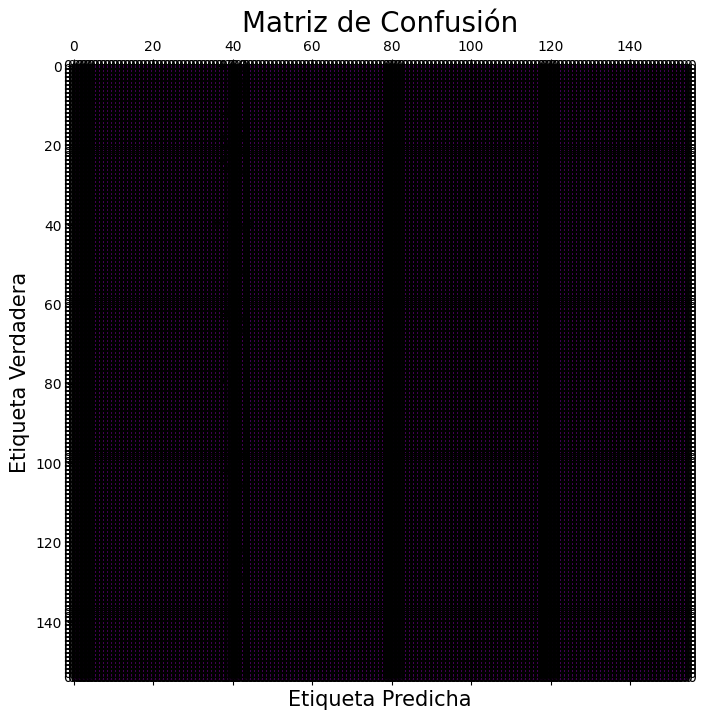

In [62]:
# Matriz de confusión 

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

## Reporte de Clasificación

In [63]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        47
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         2
        10.0       0.00      0.00      0.00         3
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         4
        15.0       0.00      0.00      0.00         3
        16.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         2
        20.0       0.00      0.00      0.00         1
        24.0       0.00    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Procedemos a graficar la recta establecida por SVM para separar las categorías. Observamos cómo clasificó el modelo tanto en el set de entrenamiento como en el de testeo.

In [49]:
# Set de entrenamiento

from matplotlib.colors import ListedColormap

X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(14,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Set de Entrenamiento)', fontsize=20)
plt.xlabel('magnitudSismo', fontsize=15)
plt.ylabel('muertesActualizadas', fontsize=15)
plt.legend()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1